# Introduction

**This notebook is a guide for beginners into machine learning, linear regression to be more specific. There will be comments every step of the way so there is a clear understanding. We will be building a house price prediction system.**

# Supervised vs Unsupervised Machine Learning

**Machine learning is divided into supervised and unsupervised learning. We train our model with data that we have previously acquired in supervised learning. In unsupervised learning, we have no data that we can train our model with.**

**Supervised machine learning is divided into classification and regression. In classification, we predict discrete values, e.g. Yes/No, Customer will purchase/Won't purchase. But in regression, we predict continuous values, such as age, price, etc.**

# Importing Libraries and dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Importing dataset
hp_dataset = sklearn.datasets.load_boston()
print(hp_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
# The data looks very unorganized so we can load it into a pandas dataframe for more structure
hp_data = pd.DataFrame(hp_dataset.data,columns=hp_dataset.feature_names)

In [4]:
# Viewing first 5 rows of the dataframe
hp_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# The price (target) column is missing so we add it
hp_data['price'] = hp_dataset.target

hp_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Missing values

In [6]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
hp_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

**Good thing we have no missing values in this dataset so no imputation (replacing missing values with other appropriate ones) necessary.**

# Correlation

<AxesSubplot:>

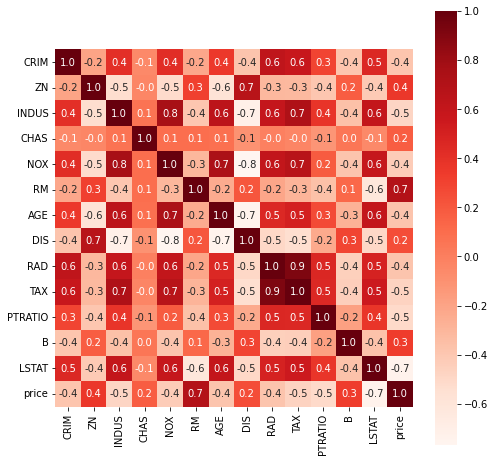

In [8]:
# We can use a heatmap to check correlation between the variables.
corr = hp_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

**This is a good visualization. We can make observations such as, as RM increases, price increases and as NOX increases, DIS decreases.**

# Splitting Data

In [9]:
# We need to split the data
X = hp_data.drop(['price'],axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = hp_data['price'] # Target

# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.

In [10]:
X.shape

(506, 13)

In [11]:
X_train.shape

(404, 13)

As we can see, 404 rows are used for testing out of 506 which is about 79.8% of the data.

# Linear Regression

**We're going to use XG Gradient Boost library. We have a lot of numerical data to train and this is a high accuracy algorithm for such cases.**

In [12]:
# We have already imported the model so we only need to load it now
model = XGBRegressor()

In [13]:
# Now we need to train the model
model.fit(X_train,y_train) # fitting means training

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Prediction and Evaluation of the Model

**First, we need to use the model to predict prices from the training data. Then, we check our model's accuracy using R squared error/ Mean Square error/ Mean Absolute error (for regression).**

In [14]:
train_pred = model.predict(X_train)
train_pred

array([23.147501 , 20.99463  , 20.090284 , 34.69053  , 13.903663 ,
       13.510157 , 21.998634 , 15.1940975, 10.899711 , 22.709627 ,
       13.832816 ,  5.592794 , 29.810236 , 49.99096  , 34.89215  ,
       20.607384 , 23.351097 , 19.23555  , 32.695698 , 19.641418 ,
       26.991022 ,  8.401829 , 46.00729  , 21.708961 , 27.062933 ,
       19.321356 , 19.288303 , 24.809872 , 22.61626  , 31.70493  ,
       18.542515 ,  8.697379 , 17.395294 , 23.700663 , 13.304856 ,
       10.492197 , 12.688369 , 25.016556 , 19.67495  , 14.902088 ,
       24.193798 , 25.007143 , 14.900281 , 16.995798 , 15.6009035,
       12.699232 , 24.51537  , 14.999952 , 50.00104  , 17.525454 ,
       21.184624 , 31.998049 , 15.613355 , 22.89754  , 19.325378 ,
       18.717896 , 23.301125 , 37.222923 , 30.09486  , 33.102703 ,
       21.00072  , 49.999332 , 13.405827 ,  5.0280113, 16.492886 ,
        8.405072 , 28.64328  , 19.499939 , 20.586452 , 45.402164 ,
       39.79833  , 33.407326 , 19.83506  , 33.406372 , 25.2714

In [15]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)
RSQscore = metrics.r2_score(y_train,train_pred)

# We can also check using mean absolute error
MAEscore = metrics.mean_absolute_error(y_train,train_pred) # just finds difference between each and finds an average

# Let's check

# The closer ithe errors are to 0, the more accurate our model is.
print("R squared error:",RSQscore) 
print("Mean absolute error:",MAEscore) 

R squared error: 0.9999948236320982
Mean absolute error: 0.0145848437110976


**Both R squared error and MAE are pretty close to 0 so we our model must be quite accurate.**

**But keep in mind that we used training data to check accuracy. We need to check using test data for a better understanding.**

In [16]:
test_pred = model.predict(X_test)
test_pred

array([20.288406 , 20.60247  , 30.9758   , 29.910797 ,  8.624953 ,
       14.235525 , 23.523052 , 29.730324 , 31.97293  , 22.015892 ,
       27.946804 , 24.034412 , 20.771402 , 21.849985 , 12.024127 ,
       22.074675 , 18.487509 , 11.052485 ,  8.141267 , 15.730722 ,
       23.163914 , 20.233883 , 35.700928 , 19.041637 , 15.129744 ,
       20.228016 , 47.067314 , 30.426474 , 32.729023 , 17.345776 ,
       17.889462 , 19.40687  , 30.769133 , 25.431686 , 12.05332  ,
       17.900238 , 11.031679 , 21.109531 , 20.64321  , 21.982754 ,
       25.016281 , 12.648555 , 31.042107 ,  7.106914 , 18.685764 ,
       14.380013 , 34.902393 , 16.130005 , 32.98537  , 10.950912 ,
       27.335018 , 29.399937 ,  7.0065055, 35.398712 , 22.978228 ,
       18.582758 , 19.224293 , 20.003431 , 15.341814 , 22.38517  ,
       19.077105 , 21.955967 , 18.91404  , 32.77595  , 32.76772  ,
       24.36317  , 48.262913 , 23.385014 , 10.551914 , 22.664684 ,
       14.671612 ,  8.881822 , 16.700302 , 17.221045 , 26.2046

In [17]:
# R squared error
TestRSQscore = metrics.r2_score(y_test,test_pred)

# Mean absolute error
TestMAEscore = metrics.mean_absolute_error(y_test,test_pred)

# Let's check

# The closer ithe errors are to 0, the more accurate our model is.
print("R squared error:",TestRSQscore) 
print("Mean absolute error:",TestMAEscore) 

R squared error: 0.8711660369151691
Mean absolute error: 2.2834744154238233


**The R squared error is pretty good as it is very close to 0 but mean absolute is a little higher than we last saw with our training data, but it's not too bad, could be improved.**

# Conclusion

So basically the workflow is like this: Import libraries and dataset -> check for missing values -> perform necessary imputation -> understand your variables -> split data -> train model -> check its accuracy -> improve model or try other ones.

**To get better accuracy, try different models or use more training data.**